<!--
 * @Author: TMJ
 * @Date: 2024-02-01 20:58:56
 * @LastEditors: TMJ
 * @LastEditTime: 2024-02-02 19:37:48
 * @Description: 请填写简介
-->
# Read files

MolOP offer an easy way to read files.

```python
from molop import AutoParser
files = AutoParser("path/to/file")
```

The `path/to/file` is a wildcard of the file path. For example, you can use `path/to/*.log` to read all g16log files in the directory `path/to/`.

In [1]:
from molop import AutoParser

files = AutoParser("../../tests/test_files/mix_format/*.log")  # path/to/file

MolOP parsing with single thread:   0%|          | 0/3 [00:00<?, ?it/s]ERROR - No version found in /home/tmj/proj/MolOP/tests/test_files/mix_format/RE_BOX-Anion-Real_Cu-III-Phenol_Major-Amide-Anion_From-IP_C-O-190_TS_Opt.log
ERROR - Failed to parse file /home/tmj/proj/MolOP/tests/test_files/mix_format/RE_BOX-Anion-Real_Cu-III-Phenol_Major-Amide-Anion_From-IP_C-O-190_TS_Opt.log with G16LogFileParser. 1 validation error for G16LogFileParser
  Value error, No version found in /home/tmj/proj/MolOP/tests/test_files/mix_format/RE_BOX-Anion-Real_Cu-III-Phenol_Major-Amide-Anion_From-IP_C-O-190_TS_Opt.log [type=value_error, input_value={'file_path': '/home/tmj/...only_last_frame': False}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v/value_error
MolOP parsing with single thread: 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]
INFO - 1 files failed to parse, 2 successfully parsed


The file reading process can be automatically parallelized if you pass files more than your CPU cores. 

## FileParserBatch

The `files` is a `FileParserBatch` object, which contains a squence of `FileParser` objects. So you can access each file by index like `files[i]`.

In [2]:
print(type(files))
print(type(files[0]))

<class 'molop.io.file_batch.FileParserBatch'>
<class 'molop.io.qm_file.G16LogFileParser.G16LogFileParser'>


## FileParser

MolOP extract all frames in a file and store them in a `FileParser` object contains a squence of `BlockParser` objects. So you can access each frame by index like `files[i][j]`.


In [3]:
print(type(files[0][0]))

<class 'molop.io.qm_file.G16LogFrameParser.G16LogFrameParser'>


## BlockParser

Each frame is a certain molcule with basic information like `coordinates`, `atoms` et. al. (For QM files, you can also get other information like `energy`, `orbital` et. al.)

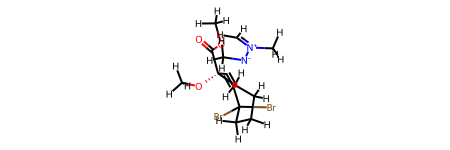

In [4]:
files[0][0].rdmol

In [5]:
files[0][0].energies

Energies(electronic_energy=None, scf_energy=<Quantity(-6028.90654, 'hartree / particle')>, mp2_energy=None, mp3_energy=None, mp4_energy=None, ccsd_energy=None, total_energy=<Quantity(-6028.90654, 'hartree / particle')>)